 ## Simple Example
 - Replicating Wikipedia's example: https://en.wikipedia.org/wiki/System_dynamics

## Importing SystemFlow

In [1]:
# Add the root directory to path. Only needed if SystemFlow not in packages
import sys
sys.path.append('../..')

In [2]:
import systemflow as sf

## Building The Model

In [3]:
potential_adopters = sf.Stock("Potential Adopters", initial_value=100, lower_limit=0)
adopters = sf.Stock("Adopters", initial_value=0, lower_limit=0)

In [4]:
p = 0.03
q = 0.4

In [5]:
probability_contract_not_yet_adopted = potential_adopters / (potential_adopters + adopters)
imitators = q * adopters * probability_contract_not_yet_adopted
innovators = p * potential_adopters

In [6]:
adopting = potential_adopters >> adopters
adopting.valve = innovators + imitators

## Showing the Relations

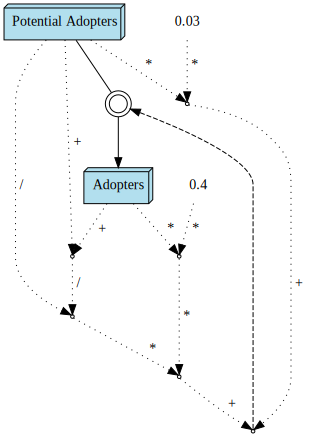

In [7]:
adopting.graphviz

## Building system and simulating

In [8]:
system = sf.System(adopting, stop=20)
system.simulate()

Note that _adopting_ includes all the components we need thus we do not need to give the system anything else. We could pass all the instances we specified but it is not necessary.

## Plot results

(<Figure size 720x504 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1b9367d1358>])

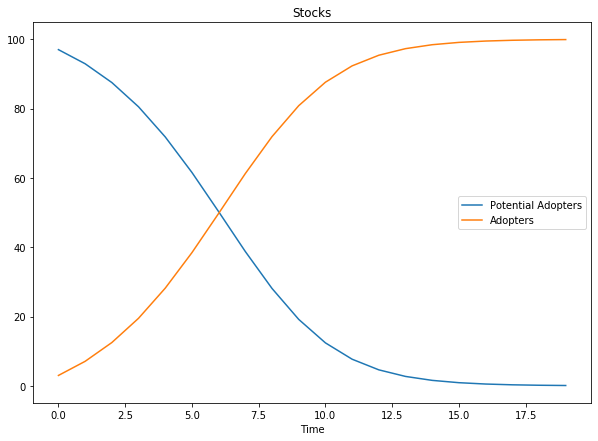

In [9]:
system.plot()

By default, only Stocks are plotted. We can also specify what we want to plot.

(<Figure size 720x1512 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B936CA9D30>,
       dtype=object))

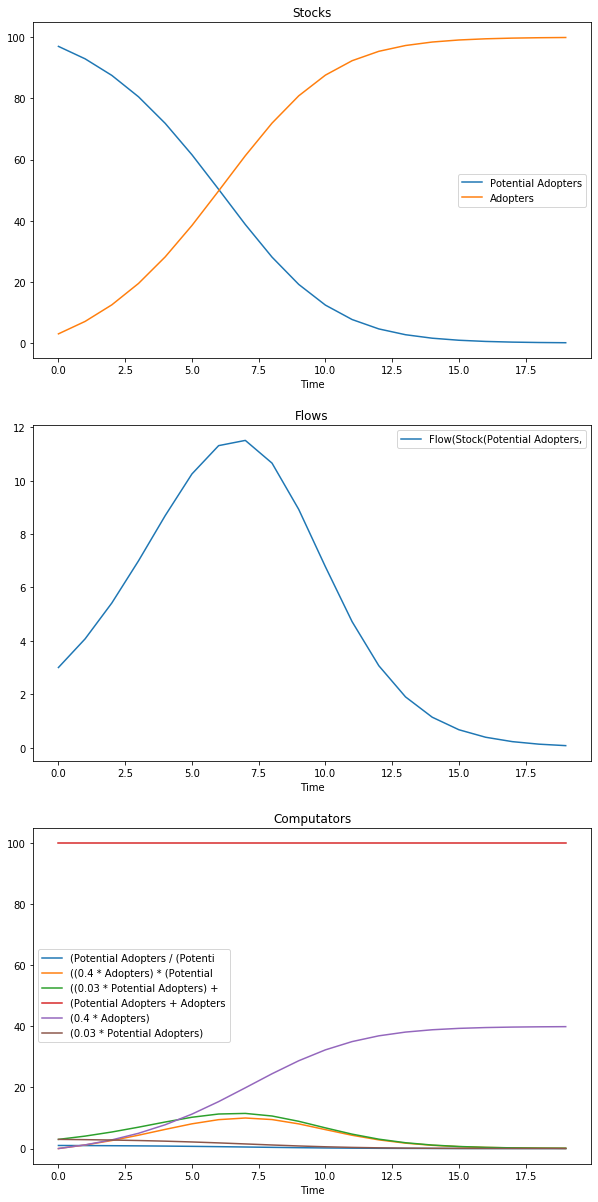

In [10]:
system.plot(stocks=True, flows=True, computators=True)